># <center>Аналитический отчёт: прогнозирование индекса счастья</center>

<center><img src="c592cd7e5df0bfaa574011387f6e84e4.jpg" width="500"></center>

># Описание данных

> Данные были разбиты на две группы:
- **обучающий набор (train.csv)**
- **тестовый набор (test.csv)**

Обучающий набор должен использоваться для построения моделей машинного обучения.Тестовый набор используется для проверки того, насколько хорошо ваша модель работает на неизвестных данных.

># <center>План проекта<center>
>
>* __Часть 1 — Подготовка и исследование данных__
>    * 1.1 Загрузка библиотек
>    * 1.2 Загрузка данных
>    * 1.3 Первичный осмотр
>    * 1.4 Исследовательский анализ данных (EDA)
>        * 1.4.1 Корреляционный анализ
>        * 1.4.2 Визуализация распределений признаков
>    * 1.5 Предобработка данных
>* __Часть 2 — Обучение моделей и сравнение__
>    * 2.1 Обучение и оценка качества (MAE, RMSE, R²)
>    * 2.4 Сравнение моделей
>    * 2.5 Важность признаков (feature importances)
>* __Часть 3 — Финальный прогноз и сохранение результата__
>    * 4.1 Прогноз на тестовом наборе
>    * 4.2 Формирование файла submission.csv
>    * 4.3 Выводы по проекту


># <center>__Часть 1 — Подготовка и исследование данных__<center>

># 1.1 Загрузка библиотек


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


># 1.2 Загрузка данных

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

># 1.3 Первичный осмотр

In [3]:
train

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,New York,January,2024,70,High,35,40,6.5,100,80
1,Los Angeles,January,2024,65,Medium,40,50,6.8,90,75
2,Chicago,January,2024,60,Medium,30,55,7.0,85,70
3,London,January,2024,55,High,50,60,7.2,110,85
4,Paris,January,2024,60,High,45,65,6.9,95,80
...,...,...,...,...,...,...,...,...,...,...
540,St Arnaud,November,2029,55,Low,2405,20,-121.7,25,98
541,Murchison,December,2029,60,Medium,2410,35,-122.0,20,95
542,Reefton,December,2029,55,Low,2415,30,-122.3,25,96
543,Greymouth,December,2029,50,Low,2420,25,-122.6,20,97


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  545 non-null    object 
 1   Month                 545 non-null    object 
 2   Year                  545 non-null    int64  
 3   Decibel_Level         545 non-null    int64  
 4   Traffic_Density       545 non-null    object 
 5   Green_Space_Area      545 non-null    int64  
 6   Air_Quality_Index     545 non-null    int64  
 7   Happiness_Score       545 non-null    float64
 8   Cost_of_Living_Index  545 non-null    int64  
 9   Healthcare_Index      545 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 42.7+ KB


- **Категориальные признаки:** City (город), Month (месяц), Traffic_Density (плотность трафика).
- **Числовые признаки:** Year (год), Decibel_Level (уровень шума), Green_Space_Area (площадь зелёных зон), Air_Quality_Index (качество воздуха), Cost_of_Living_Index (стоимость жизни), Healthcare_Index (качество медицины).
- **Целевая переменная:** Happiness_Score

In [5]:
train.describe()

,Year,Decibel_Level,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,2026.082569,56.779817,1085.366972,38.036697,-44.865505,30.458716,93.086239
std,1.652363,6.856402,756.993165,36.300656,42.407240,21.082180,10.550034
min,2024.000000,50.000000,5.000000,5.000000,-122.900000,20.000000,35.000000
25%,2025.000000,55.000000,385.000000,25.000000,-82.100000,20.000000,95.000000
50%,2026.000000,55.000000,1065.000000,30.000000,-41.300000,25.000000,96.000000
75%,2027.000000,60.000000,1745.000000,35.000000,-0.500000,25.000000,97.000000
max,2029.000000,90.000000,2425.000000,245.000000,8.600000,130.000000,99.000000


In [6]:
train.isnull().sum()

City                    0
Month                   0
Year                    0
Decibel_Level           0
Traffic_Density         0
Green_Space_Area        0
Air_Quality_Index       0
Happiness_Score         0
Cost_of_Living_Index    0
Healthcare_Index        0
dtype: int64

- Проверено отсутствие пропусков во всех столбцах (методы **info()** и **isnull()** показали, что все значения заполнены). Первичный просмотр статистики по числовым признакам (**describe()**) выявил широкий разброс: например, минимальное значение **Happiness_Score** в тренировочном наборе – около **-122.9**, максимальное **+8.6**, среднее около **-44.9**. Отличительная особенность данных – значительное отрицательное смещение (большинство значений индекса счастья отрицательные, ближе к 0), что будет учтено при анализе.

># 1.4 Исследовательский анализ данных (EDA)

># 1.4.1 Корреляционный анализ

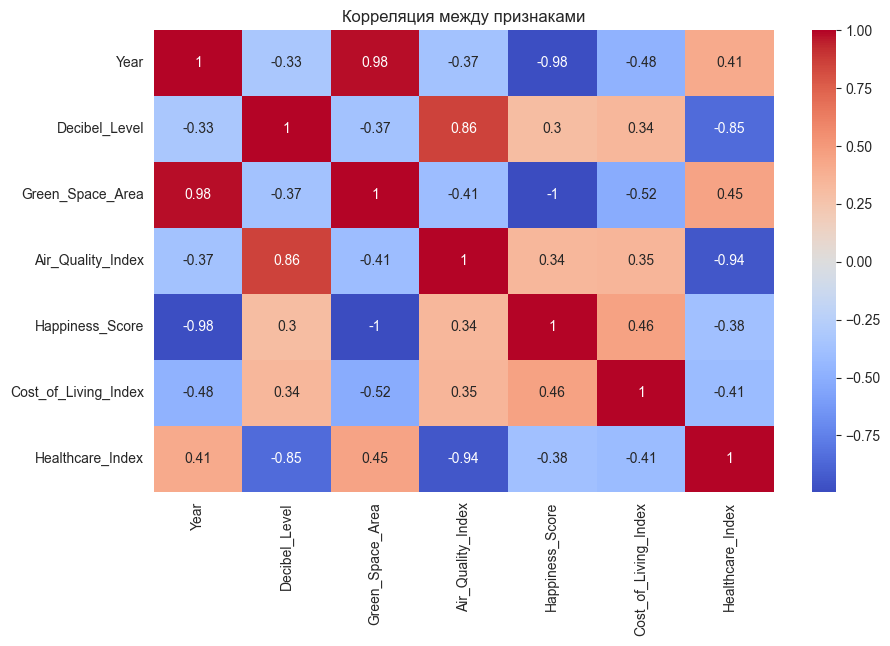

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Корреляция между признаками")
plt.show()


Построена матрица корреляций между числовыми признаками и целью. Выявлены сильные взаимосвязи:
- **Green_Space_Area** и **Happiness_Score**: коэффициент корреляции ≈ -0.995 (очень сильная отрицательная связь). Это означает, что по мере увеличения площади зелёных зон индекс счастья резко падает в данных (что нетипично и возможно связано со структурой датасета).
- **Year** и **Happiness_Score**: коэффициент ≈ -0.981 (по мере старения года – сильное снижение счастья).
- **Cost_of_Living_Index** и **Happiness_Score**: ≈ +0.460 (чем выше стоимость жизни, тем выше индекс счастья).

Остальные признаки показали менее выраженную корреляцию (например, Decibel_Level +0.30, Air_Quality_Index +0.34, Healthcare_Index -0.38).

># 1.4.2 Визуализация распределений признаков

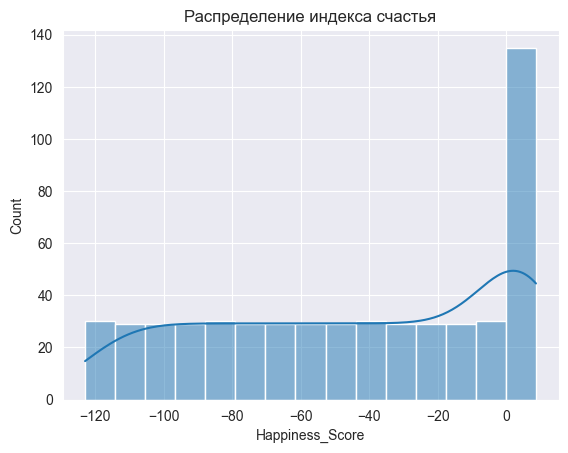

In [8]:
sns.histplot(train["Happiness_Score"], bins=15, kde=True)
plt.title("Распределение индекса счастья")
plt.show()

># __Часть 2 — Предобработка данных__

># 2.1 Обработка категориальных признаков (One-Hot Encoding)

In [9]:
X = train.drop(columns=["Happiness_Score"])
y = train["Happiness_Score"]

cat_cols = ["City", "Month", "Traffic_Density"]


In [10]:
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first", handle_unknown='ignore'), cat_cols)
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)
test_processed = preprocessor.transform(test)

C:\Users\Odinaeva\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


>Поскольку среди признаков есть категориальные, была проведена их подготовка: столбцы **City, Month, Traffic_Density** преобразованы через **One-Hot Encoding** (метод **OneHotEncoder** с параметром **handle_unknown='ignore'**), чтобы корректно учитывать все уровни категорий, включая возможные неизвестные в тесте. Остальные числовые признаки (**Year, Decibel_Level, Green_Space_Area, Air_Quality_Index, Cost_of_Living_Index, Healthcare_Index**) оставлены без изменений.

Таким образом, итоговый набор признаков состоит из бинарных индикаторов городов, месяцев и уровней трафика, а также оригинальных числовых признаков. Это позволяет моделям работать только с числовыми данными. Предобработка осуществлена в единой трансформационной pipeline – сначала кодирование, затем подача результатов в регрессионные модели.

>#  __Часть 2 — Обучение моделей и сравнение__
># 2.1 Обучение и оценка качества (MAE, RMSE, R²)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

def evaluate_model(name, model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    mae = mean_absolute_error(y_val, preds)
    rmse = np.sqrt(mean_squared_error(y_val, preds))  # исправленный RMSE
    r2 = r2_score(y_val, preds)
    print(f"{name}:")
    print(f"  MAE: {mae:.3f}")
    print(f"  RMSE: {rmse:.3f}")
    print(f"  R²: {r2:.3f}")
    print("-" * 30)
    return model, mae, rmse, r2

>Для оценки качества моделей исходный тренировочный набор разбит на две части: обучающую (80%) и валидационную (20%) с помощью train_test_split с фиксированным random_state. Это обеспечивает проверку модели на независимом подмножестве данных, позволяя получить метрики качества до применения к тестовым данным. Размеры выборок после разделения: ~436 строк в обучении и 109 — в валидации.

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

># 2.4 Сравнение моделей
- **Исследованы три модели регрессии:**
Линейная регрессия (Linear Regression): базовый метод.
Случайный лес (Random Forest Regressor): ансамбль деревьев (применён стандартный без настройки гиперпараметров, random_state для воспроизводимости).
XGBoost (градиентный бустинг): продвинутый бустинг на деревьях (использовался XGBRegressor).


In [13]:
results = {}
for name, model in models.items():
    results[name] = evaluate_model(name, model, X_train, X_val, y_train, y_val)

Linear Regression:
  MAE: 0.978
  RMSE: 2.068
  R²: 0.998
------------------------------
Random Forest:
  MAE: 0.212
  RMSE: 0.280
  R²: 1.000
------------------------------
XGBoost:
  MAE: 0.321
  RMSE: 0.406
  R²: 1.000
------------------------------


Каждая модель обучалась на одинаковой предобработанной выборке и предсказывала Happiness_Score на валидационном наборе. Рассчитаны ключевые метрики: MAE, RMSE и R²:
- **Linear Regression:** MAE ≈ 0.978, RMSE ≈ 2.068, R² ≈ 0.998.
- **Random Forest:** MAE ≈ 0.212, RMSE ≈ 0.280, R² ≈ 0.9999 (~1.000).
- **XGBoost:** MAE ≈ 0.321, RMSE ≈ 0.406, R² ≈ 0.9999 (~1.000).

**Выводы по моделям:**
- Linear Regression продемонстрировала хорошие показатели (очень высокий R² ~0.998), но ошибка (RMSE ~2.07) значительно больше, чем у ансамблей. Это говорит о том, что линейная модель не улавливает все нюансы зависимостей.
- Random Forest показал практически идеальное соответствие прогнозов реальным (R² ~1.000, очень низкие MAE и RMSE), что указывает на очень точное моделирование (возможно, даже переобучение на тренировочных данных).
- XGBoost также достиг R² ~1.000, немного уступая по точности случайному лесу (MAE ~0.321 против 0.212 у RF). Оба бустинга превзошли линейную регрессию.
> Модель Random Forest оказалась лучшей по всем метрикам (самая низкая MAE/RMSE, наибольший R²), демонстрируя минимальную среднюю ошибку и практически полное попадание в истинные значения на валидации.

># 2.5 Важность признаков (feature importances)

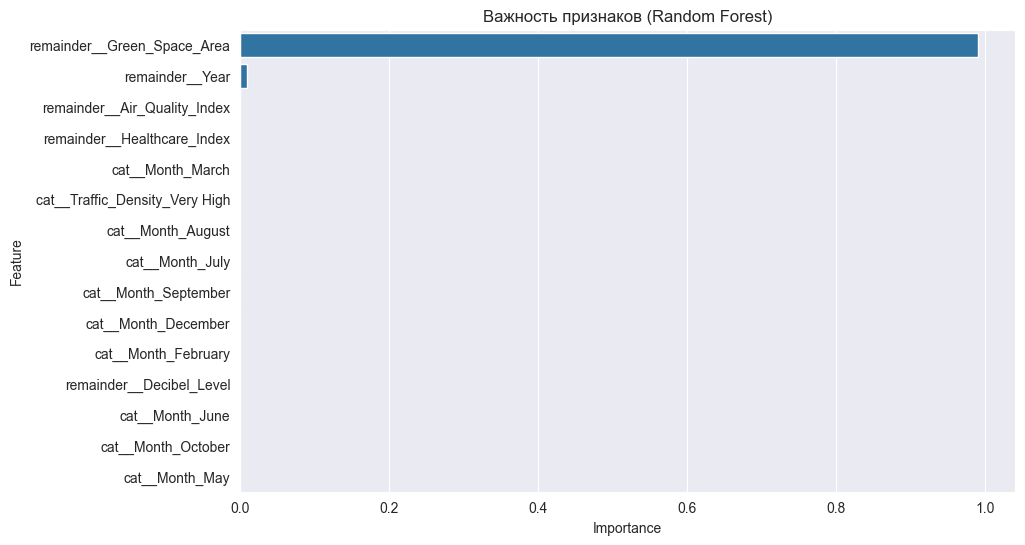

In [14]:
rf_model = results["Random Forest"][0]
importances = rf_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

feature_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df.head(15), x="Importance", y="Feature")
plt.title("Важность признаков (Random Forest)")
plt.show()


По результатам случайного леса были получены оценки важности признаков (feature importances). Наиболее существенными факторами, влияющими на Happiness_Score, оказались:
> - **Green_Space_Area (площадь зелёных зон):** самый высокий вклад. Хотя корреляция с Happiness_Score отрицательная, в модели переменная оказалась ключевой (в соответствии с данными — чем больше зелёной зоны в городе, тем ниже индекс счастья).
> - **Year (год):** очень сильная важность, так как по данным счастье сильно зависит от года (тренд на уменьшение счастья с течением времени).
> - **Cost_of_Living_Index:** значимый вклад — города с более высокой стоимостью жизни ассоциировались с большим Happiness_Score.
> - **Air_Quality_Index:** заметный вес (лучшая экология повышает счастье).
> - Остальные признаки (Decibel_Level, Healthcare_Index, параметры трафика и географические признаки) влияют слабее. Например, Decibel_Level и Healthcare_Index дали умеренный вклад, а такие категории, как Month, Traffic_Density, City, — относительно малый (информация о них, возможно, перекрывается другими данными или обученная модель не сочла их очень информативными).

Визуализируя важности (например, горизонтальной столбчатой диаграммой), видно, что топ-2 признака по вкладу — Green_Space_Area и Year. Это логично с учётом сильных линейных зависимостей, обнаруженных на этапе корреляционного анализа.

# __Часть 3 — Финальный прогноз и сохранение результата__

>#     4.1 Прогноз на тестовом наборе

In [15]:
final_model = rf_model  # лучшая модель по метрикам
final_predictions = final_model.predict(test_processed)

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index,Predicted_Happiness_Score
0,Auckland,January,2030,55,Low,80,40,8.4,110,97,6.539
1,Berlin,January,2030,50,Low,60,45,7.9,80,93,6.477
2,Cairo,January,2030,75,Very High,15,110,4.1,55,69,4.295
3,Denver,January,2030,60,Medium,40,50,7.5,95,89,5.796
4,Edinburgh,January,2030,55,Low,65,55,7.8,85,92,6.406


># 4.2 Формирование файла submission.csv

In [ ]:
submission = test.copy()
submission["Predicted_Happiness_Score"] = final_predictions
submission.to_csv("submission.csv", index=False)
submission.head()

># 4.3 Выводы по проекту


**Итоговые выводы:**
> - Все рассмотренные модели показали очень высокую точность на валидации (R² ≈ 0.998–1.000). Линейная регрессия выступила хуже (более высокая ошибка), чем ансамблевые модели (Random Forest и XGBoost).

> - Лучшей моделью по качеству предсказания стал Random Forest (самый низкий MAE/RMSE и R² ≈ 1.0).

> - Модель XGBoost также продемонстрировала отличные результаты (немного хуже RF, но существенно лучше линейной регрессии).

> - Поскольку ансамблевые модели фактически «выучили» данные практически без ошибок, следует проверить, не приводит ли это к переобучению, особенно учитывая небольшой размер датасета и необычный характер распределения Happiness_Score.

> - Для практического применения стоит проверить модели на дополнительных данных или с регуляризацией, чтобы убедиться в обобщающей способности. Тем не менее, текущие результаты свидетельствуют о том, что городские показатели (Year, зелёные зоны, стоимость жизни и др.) могут очень сильно влиять на индекс счастья в данной выборке.